# Dask DataFrame

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Dask DataFrame"
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.memory_usage_per_partition.html#dask.dataframe.DataFrame.memory_usage_per_partition
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.map_partitions.html#dask.dataframe.DataFrame.map_partitions
* https://docs.dask.org/en/stable/generated/dask.array.histogram.html
* https://docs.dask.org/en/stable/dataframe-categoricals.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.pivot_table.html#dask.dataframe.DataFrame.pivot_table
* https://docs.dask.org/en/stable/generated/dask.dataframe.groupby.DataFrameGroupBy.apply.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.Series.map_overlap.html#dask.dataframe.Series.map_overlap

* https://docs.dask.org/en/stable/best-practices.html
* https://docs.dask.org/en/stable/dashboard.html
* https://distributed.dask.org/en/stable/client.html

## Задачи для совместного разбора

In [1]:
lst = []
for i in range(1, 10):
    for j in range(1, 10):
        for k in range(1, 10):
            lst.append((i,j,k))

In [2]:
print(lst)

[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 1, 8), (1, 1, 9), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 2, 8), (1, 2, 9), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 3, 8), (1, 3, 9), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 4, 8), (1, 4, 9), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (1, 5, 6), (1, 5, 7), (1, 5, 8), (1, 5, 9), (1, 6, 1), (1, 6, 2), (1, 6, 3), (1, 6, 4), (1, 6, 5), (1, 6, 6), (1, 6, 7), (1, 6, 8), (1, 6, 9), (1, 7, 1), (1, 7, 2), (1, 7, 3), (1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 7), (1, 7, 8), (1, 7, 9), (1, 8, 1), (1, 8, 2), (1, 8, 3), (1, 8, 4), (1, 8, 5), (1, 8, 6), (1, 8, 7), (1, 8, 8), (1, 8, 9), (1, 9, 1), (1, 9, 2), (1, 9, 3), (1, 9, 4), (1, 9, 5), (1, 9, 6), (1, 9, 7), (1, 9, 8), (1, 9, 9), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 1, 8), (2, 1, 9), (2, 2, 1)

In [6]:
import dask

1\. Создать `dask.DataFrame`. Рассмотреть основные возможности (выбор строк, группировки, работа с датами, добавление столбцов)

In [2]:
df = dask.datasets.timeseries(start='2000-01-01', end='2003-10-10')

In [14]:
df

,name,id,x,y
npartitions=1378,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2003-10-09,...,...,...,...
2003-10-10,...,...,...,...


In [13]:
df.head(5)

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,George,994,-0.419353,0.638951
2000-01-01 00:00:01,Ingrid,1059,-0.390432,0.890057
2000-01-01 00:00:02,Bob,975,0.512143,0.515065
2000-01-01 00:00:03,Hannah,1017,-0.433844,-0.346380
2000-01-01 00:00:04,Bob,1000,-0.324512,0.763372


In [15]:
df['xy'] = df['x'] + df['y']

In [16]:
df

,name,id,x,y,xy
npartitions=1378,,,,,
2000-01-01,object,int32,float64,float64,float64
2000-01-02,...,...,...,...,...
...,...,...,...,...,...
2003-10-09,...,...,...,...,...
2003-10-10,...,...,...,...,...


In [19]:
df[df['name'] =='Edith'].size.compute()

22899255

     --------------------------------------- 18.5/18.5 MB 34.7 kB/s eta 0:00:00


Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.5.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.6.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
  Consider

     --------------------------------------- 18.5/18.5 MB 58.4 kB/s eta 0:00:00


Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.5.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.6.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
  Consider

2\. Рассмотреть средства диагностики `dask`

In [3]:
from dask.diagnostics import ProgressBar

In [4]:
from dask.distributed import Client

In [20]:
with ProgressBar():
    df.groupby(df.index.dt.to_period('M'))['x'].max().compute()

[########################################] | 100% Completed | 56.71 s


In [21]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.82 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63820,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.82 GiB
Comm: tcp://127.0.0.1:63850,Total threads: 2
Dashboard: http://127.0.0.1:63853/status,Memory: 3.95 GiB
Nanny: tcp://127.0.0.1:63824,


In [25]:
%%time
df.groupby(df.index.dt.to_period('M'))['x'].max().compute()

CPU times: total: 22.5 s
Wall time: 41.4 s


timestamp
2000-01    0.999999
2000-02    1.000000
2000-03    1.000000
2000-04    1.000000
2000-05    1.000000
2000-06    1.000000
2000-07    0.999999
2000-08    1.000000
2000-09    0.999999
2000-10    1.000000
2000-11    0.999999
2000-12    0.999998
2001-01    0.999999
2001-02    0.999998
2001-03    1.000000
2001-04    0.999998
2001-05    0.999999
2001-06    0.999998
2001-07    0.999998
2001-08    1.000000
2001-09    1.000000
2001-10    0.999999
2001-11    1.000000
2001-12    0.999998
2002-01    0.999998
2002-02    0.999997
2002-03    1.000000
2002-04    1.000000
2002-05    1.000000
2002-06    1.000000
2002-07    0.999999
2002-08    1.000000
2002-09    0.999997
2002-10    0.999999
2002-11    1.000000
2002-12    0.999999
2003-01    1.000000
2003-02    1.000000
2003-03    0.999998
2003-04    1.000000
2003-05    0.999999
2003-06    1.000000
2003-07    0.999999
2003-08    1.000000
2003-09    1.000000
2003-10    0.999995
Freq: M, Name: x, dtype: float64

3\. Изучить, как влияет вызов `persist` на производительность

In [26]:
female = {"Edith", "Wendy", "Quinn", "Hannah", "Ursula", "Laura", "Sarah", "Alice"}

In [30]:
female_df = df[df['name'].isin(female)].persist()

In [31]:
%%time
female_df.groupby('name')['x'].max().compute()

CPU times: total: 23.1 s
Wall time: 37.7 s


name
Alice     0.999999
Edith     1.000000
Hannah    1.000000
Laura     0.999999
Quinn     1.000000
Sarah     1.000000
Ursula    1.000000
Wendy     1.000000
Name: x, dtype: float64

In [29]:
#without persist
%%time
(female_df['x'] * 2).std().compute()

CPU times: total: 20.5 s
Wall time: 38.3 s


1.1547655773237933

In [36]:
%%time
#with persist
(female_df['x'] * 2).std().compute()

CPU times: total: 3.56 s
Wall time: 4.22 s


1.1547655773237933

2022-12-08 21:48:49,904 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:63841', name: 3, status: running, memory: 346, processing: 0>
2022-12-08 21:48:50,808 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:63847', name: 2, status: running, memory: 343, processing: 1>
2022-12-08 21:48:50,991 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:63841'.
2022-12-08 21:48:50,996 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:63847'.


## Лабораторная работа 13

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.DataFrame` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.DataFrame` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.DataFrame` (то есть то, что было получено до вызова `compute`, а не после).

1\. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты. Выведите на экран информацию о количестве сегментов и типе столбцов. Выведите на экран 5 первых и 5 последних строк таблицы. В случае сообщения об ошибке объясните причину и исправьте ошибку.

In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client
import numpy as np
path = 'C://Users//icom1//OneDrive - icom//Рабочий стол//TOBD_datasets//'
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.82 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57893,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.82 GiB
Comm: tcp://127.0.0.1:57920,Total threads: 2
Dashboard: http://127.0.0.1:57926/status,Memory: 3.95 GiB
Nanny: tcp://127.0.0.1:57899,


In [2]:
recipes_full = [f'{path}recipes_full_{i}.csv' for i in range(8)]
recipes = dd.read_csv(recipes_full, parse_dates=['submitted'])

In [3]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


In [4]:
recipes.tail(5)

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+---------+---------+----------+
| Column  | Found   | Expected |
+---------+---------+----------+
| minutes | float64 | int64    |
| n_steps | float64 | int64    |
+---------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'minutes': 'float64',
       'n_steps': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.

In [3]:
recipes = dd.read_csv(recipes_full, parse_dates=['submitted'], dtype={'minutes': 'float64', 'n_steps': 'float64'})

In [6]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
278953,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


Usually this is due to dask's dtype inference failing, and may be fixed by specifying dtypes manually by adding dtypes manually
---

2\. Выведите на экран следующую информацию:
* количество сегментов в таблице
* объем используемой памяти каждого сегмента
* количество строк в каждом сегменте
* количество строк во всей таблице.

In [7]:
recipes.npartitions

8

In [8]:
recipes.memory_usage_per_partition(index=True).compute()

0    17853248
1    17853248
2    17853248
3    17853248
4    17853248
5    17853184
6    17853184
7    17853184
dtype: int64

In [9]:
recipes.map_partitions(len).compute()

0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64

In [10]:
recipes.shape[0].compute()

2231637

3\. В архиве `recipes_additional.zip` находятся файлы, содержащие информацию об рецептах блюд, полученные из другого источника. В связи с этим названия и количество столбцов в этих данных отличаются от того, что находится в архиве `recipes_full.zip`.

Объедините два набора набора данных, согласовав названия столбцов и форматы данных. Добавьте столбец с информацией о том, из какого датасета была получены данные.

In [4]:
recipes_additional = [f'{path}recipes_additional_{i}.csv' for i in range(5)]
recipes_add = dd.read_csv(recipes_additional, parse_dates=['date_of_publication'], dayfirst=True)

In [12]:
recipes.head(1)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9


In [13]:
recipes_add.head(1)

,name,description,hours,date_of_publication,#tags,#ingredients,recipe_id,views_30_days
0,blue cheese tenders,found this recipe in my mom's older recipes. ...,0.333333,2008-02-01,12,5,52604,2001


In [5]:
recipes_add['hours'] = recipes_add['hours'] * 60
recipes_add['hours'] = recipes_add['hours'].round(0)
recipes_add['contributor_id'] = np.nan
recipes_add['n_steps'] = np.nan
recipes_add['info'] = "additional"
recipes_add = recipes_add[['recipe_id', 
                           'name', 
                           'hours', 
                           'contributor_id', 
                           'date_of_publication', 
                           'n_steps', 
                           'description', 
                           '#ingredients', 
                           'info', 
                           '#tags', 
                           'views_30_days'
                          ]]

recipes_add = recipes_add.rename(columns={"recipe_id": "id", 
                                          "hours": "minutes", 
                                          "date_of_publication": "submitted", 
                                          "#ingredients": "n_ingredients", 
                                          "#tags": "tags"}
                                )

recipes["info"] = "initial"
recipes["tags"] = np.nan
recipes["views_30_days"] = np.nan

In [6]:
recipes_full = dd.multi.concat([recipes_add, recipes]).persist()

In [16]:
recipes_full.head(1)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,info,tags,views_30_days
0,52604,blue cheese tenders,20.0,NaN,2008-02-01,NaN,found this recipe in my mom's older recipes. ...,5,additional,12.0,2001.0


4\. Выясните, сколько рецептов содержат слово `chocolate`. Выведите на экран набор уникальных идентификаторов авторов таких рецептов.

In [9]:
recipes_full[recipes_full.name.str.contains('chocolate', na=False)]['contributor_id'].unique().compute()

0            NaN
1       489552.0
2       869184.0
3       705251.0
4       897375.0
          ...   
4453     20591.0
4454    179232.0
4455    294700.0
4456    737510.0
4457    146121.0
Name: contributor_id, Length: 4458, dtype: float64

5\. При помощи функции `da.histogram` посчитайте значения для построения гистограммы для столбца `n_ingredients`. Визуализируйте полученные результаты при помощи функции `plt.bar`. Добавьте на рисунок 2 вертикальные линии, соответствующие квантилям уровней 0.25 и 0.75. Сделайте масштаб вертикальной оси логарифмическим.

Допускается вычисление статистики по столбцу (применение метода `compute`) до того, как будет вызван `da.histogram`. 

In [18]:
import dask.array as da
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
range_min = recipes_full['n_ingredients'].min().compute()
range_max = recipes_full['n_ingredients'].max().compute()

In [20]:
quantile_25 = recipes_full['n_ingredients'].quantile(0.25).compute()
quantile_75 = recipes_full['n_ingredients'].quantile(0.75).compute()

In [21]:
recipes_full['n_ingredients'].unique().count().compute()

41

In [22]:
n_ingredients, bins = da.histogram(recipes_full['n_ingredients'], bins=41, range=[range_min, range_max])

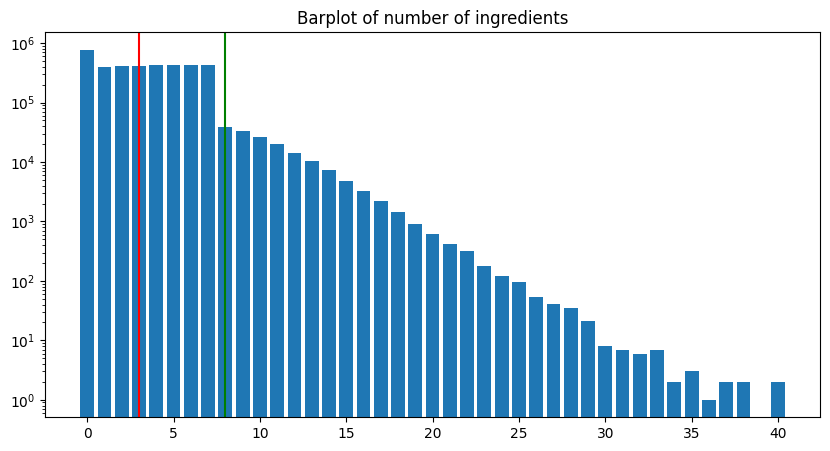

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(np.arange(41), n_ingredients.compute())
ax.axvline(x = quantile_25, color = 'r', linestyle = '-')
ax.axvline(x = quantile_75, color = 'g', linestyle = '-')
ax.set_title('Barplot of number of ingredients')
ax.set_yscale('log')
None

6\. Постройте сводную таблицу при помощи метода `pivot_table`, где по строкам располагаются года, по столбцам - названия месяцев, а в ячейках содержится средняя длина рецептов в данный год и месяц.

In [9]:
recipes_full['year_pivot'] = recipes_full.submitted.dt.year.astype("category")
recipes_full['month_pivot'] = recipes_full.submitted.dt.month_name().astype("category")
recipes_full.year_pivot = recipes_full.year_pivot.cat.as_known()
recipes_full.month_pivot = recipes_full.month_pivot.cat.as_known()

In [12]:
from dask.dataframe.reshape import pivot_table
recipes_full.pivot_table(
            index='year_pivot',
            columns='month_pivot', 
            values='n_steps', 
            aggfunc='mean'
).compute()

month_pivot,April,August,December,February,January,July,June,March,May,November,October,September
year_pivot,,,,,,,,,,,,
1970,3.522034,3.513632,3.501818,3.475705,3.508469,3.492839,3.585450,3.530987,3.548112,3.518427,3.490892,3.570332
1971,3.491377,3.507380,3.490399,3.490429,3.475529,3.476765,3.493417,3.481425,3.437404,3.482288,3.532995,3.535331
1972,3.514322,3.508428,3.465145,3.533469,3.498636,3.490976,3.420665,3.488138,3.461328,3.524749,3.488264,3.499524
1973,3.479864,3.473813,3.462290,3.458194,3.491137,3.467829,3.470588,3.542309,3.495449,3.461368,3.551240,3.488981
1974,3.471990,3.580192,3.542999,3.432735,3.487783,3.488063,3.525318,3.503784,3.552632,3.473564,3.541315,3.506718
1975,3.468132,3.456713,3.480241,3.506372,3.451385,3.484511,3.561200,3.523516,3.511084,3.527188,3.532772,3.498450
1976,3.509731,3.471092,3.558752,3.471589,3.503192,3.522110,3.475598,3.513716,3.513688,3.454402,3.527687,3.447971
1977,3.514250,3.522615,3.500316,3.511674,3.530153,3.520222,3.504681,3.462063,3.521486,3.491344,3.485005,3.486284
1978,3.570901,3.499846,3.480694,3.473720,3.461816,3.487515,3.537826,3.478039,3.471727,3.507269,3.558182,3.514793


7\. Удалите строки, которые содержат пропуске в столбце `contributor_id` и приведите его тип к целочисленному. Для каждого `contributor_id` найдите топ-5 слов, которых этот пользователь наиболее часто использовал в названиях своих рецептов. Выведите на экран статистику для пользователя с ID 1530.

In [7]:
recipes_full = recipes_full.dropna(subset=['contributor_id'])
recipes_full.contributor_id = recipes_full.contributor_id.astype('int')

In [8]:
import re
pattern = re.compile(r"(\w+)")

In [9]:
recipes_full['name_lst'] = recipes_full['name'].fillna('').map(pattern.findall)

In [10]:
id_n_desc = recipes_full[['contributor_id', 'name_lst']].explode(column='name_lst')

In [11]:
words_df = id_n_desc.groupby('contributor_id')

In [12]:
nlargest = words_df.apply(lambda i: i['name_lst'].value_counts().nlargest(5), meta =('contributor_id', 'int'))

In [14]:
nlargest.compute()

contributor_id           
1538            s            5
                ii           3
                cake         3
                persian      2
                grandma      2
                            ..
2002169699      sneaky       1
                lightship    1
                hop          1
                buenos       1
                spare        1
Name: contributor_id, Length: 139626, dtype: int64

In [13]:
nlargest.loc[1530].compute()

contributor_id           
1530            chocolate    7
                muffins      6
                bread        5
                and          4
                whole        3
Name: contributor_id, dtype: int64

8\. В файлах архива `site_logs.zip` находятся логи системы. Считайте эти логи в виде `dask.bag`, выделите их них дату, время, id службы, уровень лога и сообщение. Объедините дату и время в одну строку. Преобразуйте `dask.bag` в `dask.dataframe`, предварительно оставив только логи уровня "INFO". Подтвердите корректность решения, выведя на экран уникальные значения столбца `level` полученной таблицы.

```
date(ymd)   time(HMS)   service_id level   msg
081110      103041      34         INFO    dfs.FSNamesystem: BLOCK* NameSystem.delete: ...
```

In [33]:
import json
import dask.bag as db
logs = db.read_text(path+'logs_a*')
logs.take(2)

('081109 203518 143 INFO dfs.DataNode$DataXceiver: Receiving block blk_-1608999687919862906 src: /10.250.19.102:54106 dest: /10.250.19.102:50010\n',
 '081109 203518 35 INFO dfs.FSNamesystem: BLOCK* NameSystem.allocateBlock: /mnt/hadoop/mapred/system/job_200811092030_0001/job.jar. blk_-1608999687919862906\n')

In [34]:
def concate_first_elem_and_msg(s):
    s = s.split()
    time = s[0] + s[1]
    service_id = s[2]
    level = s[3]
    msg = ' '.join(s[4:])
    res_s = []
    res_s.append(time)
    res_s.append(service_id)
    res_s.append(level)
    res_s.append(msg)
    return res_s

def is_info(lst):
    return lst if lst[2] == 'INFO' else None

In [35]:
logs_df = logs.map(concate_first_elem_and_msg).filter(is_info).to_dataframe(
    columns=['datetime', 
             'service_id', 
             'level', 
             'msg']
)

In [18]:
logs_df.level.unique().compute()

0    INFO
Name: level, dtype: object

9\. Добавьте в таблицу из задания 8 столбец `is_delete_op`, который содержит флаг: является ли данная операция удалением чего-либо или нет. Для выяснения этого факта проанализизируйте сообщение лога. 

Для каждого лога подсчитайте, сколько из записанных перед ним последних 100 логов являются операциями удаления. Для вычислений используйте метод `map_overlap`. Посчитайте и выведите на экран, сколько существует подпоследовательностей не менее чем из 75 сообщений, содержащих операции удаления.

In [36]:
import re
pattern = re.compile(r"deleting", re.I)
logs_df['is_delete_op'] = logs_df.msg.apply(lambda i: bool(pattern.findall(i)), meta=('mas', 'str'))

In [ ]:
def is_deleting(log):
    counter = 0

del_100 = logs_df.map_overlap(derivative, depth=1, boundary=0)

10\. Сгруппируйте таблицу с логами по часу, в котором был оставлен лог. Под часом имеется в виду час конкретного дня, то связь связка год-месяц-день-час.  Посчитайте, сколько логов было записано за каждый час. Визуализируйте полученную динамику. Добавьте подписи засечек, подписи осей и название рисунка.

In [37]:
logs_df.dtypes

datetime        object
service_id      object
level           object
msg             object
is_delete_op    object
dtype: object

In [38]:
logs_df.head()

,datetime,service_id,level,msg,is_delete_op
0,081109203518,143,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...,False
1,081109203518,35,INFO,dfs.FSNamesystem: BLOCK* NameSystem.allocateBl...,False
2,081109203519,143,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...,False
3,081109203519,145,INFO,dfs.DataNode$DataXceiver: Receiving block blk_...,False
4,081109203519,145,INFO,dfs.DataNode$PacketResponder: PacketResponder ...,False


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1)

ax.bar(vis.index, vis.values)
ax.set_ylabel('Number of logs')
ax.set_xlabel('Datetime grouped by hours')
ax.set_title('Number of logs in specific day-hour')